A trader is developing a new trading strategy to apply on the stock market. He has collected stock price data to backtest his strategy (see how it performs on historical data to get an idea of how it will perform in real life). His strategy involves buying whenever the 5-period moving average of a stock’s daily closing price crosses its 20-period moving average and selling when it crosses back over. The strategy buys and sells on the opening price of the day after a buy/sell signal (i.e. if the 5-period moving average crosses the 20-period moving average on 01/01/2018, it will buy/sell on the opening price of the 02/01/2018). The trader has asked for your help in evaluating the strategy on the stock 
data on iLearn. This data consists of the daily stock prices for ANZ, CBA, BHP, RIO and WES from January 2002 to August 2018. Data for each stock is provided in a separate CSV file. Each file contains the following fields: 
o Date – date of the trading day o Open – opening price of stock that day o High – highest price of stock that day o Low – lowest price of stock that day o Close – closing price of stock that day o Volume – amount of stock that was traded that day o Member – whether the stock is a member of ASX200 
Task 1 (10 marks) 
• Create a line plot using different colours to show the closing prices of the stock data over time.
• Calculate and display the correlations between the closing prices of the stock data. 
Create a heatmap showing these correlations. Comment on what the numbers and plot say about the correlation between the stocks. 




https://ntguardian.wordpress.com/2018/07/17/stock-data-analysis-python-v2/

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv(r"/content/WES.csv",parse_dates=['Date'])
df_1 = pd.read_csv(r"/content/RIO.csv",parse_dates=['Date'])
df_2 = pd.read_csv(r"/content/ANZ.csv",parse_dates=['Date'])
df_3 = pd.read_csv(r"/content/BHP.csv",parse_dates=['Date'])
df_4 = pd.read_csv(r"/content/CBA.csv",parse_dates=['Date'])

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


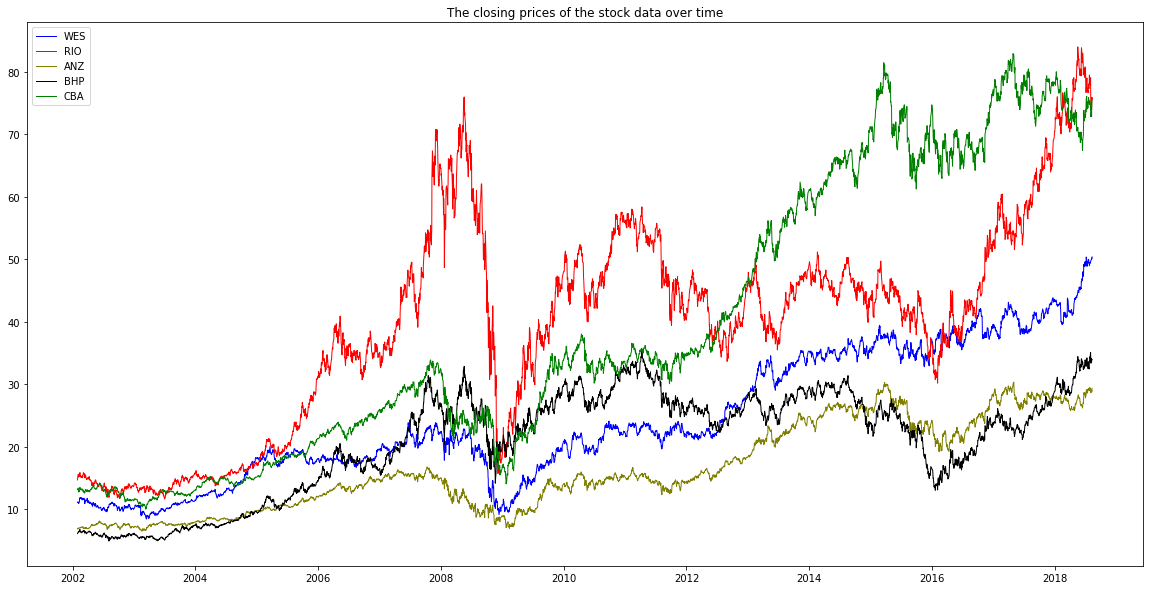

In [0]:
plt.figure(figsize=(20,10))
plt.plot( 'Date', 'Close', data=df, color='blue', linewidth=1, label="WES")
plt.plot( 'Date', 'Close', data=df_1, color='red', linewidth=1, label="RIO")
plt.plot( 'Date', 'Close', data=df_2, color='olive', linewidth=1, label="ANZ")
plt.plot( 'Date', 'Close', data=df_3, color='black', linewidth=1, label="BHP")
plt.plot( 'Date', 'Close', data=df_4, color='green', linewidth=1, label="CBA")
plt.legend()
plt.title("The closing prices of the stock data over time")
plt.show()

In [0]:
df['Stock'] = 'WES'
df_1['Stock'] = 'RIO'
df_2['Stock'] = 'ANZ'
df_3['Stock'] = 'BHP'
df_4['Stock'] = 'CBA'
data = pd.concat([df,df_1,df_2,df_3,df_4], ignore_index=True)
data.drop('Member',axis=1,inplace=True)

In [0]:
data.head()

,Date,Open,High,Low,Close,Volume,Stock
0,2002-01-31,10.9880,11.1517,10.9880,11.1336,352225,WES
1,2002-02-01,11.1517,11.2245,11.0786,11.0786,420276,WES
2,2002-02-04,11.1554,11.2318,11.1190,11.1325,252276,WES
3,2002-02-05,11.1041,11.1517,11.0790,11.0972,289673,WES
4,2002-02-06,11.0972,11.0972,10.9407,10.9407,405261,WES


In [0]:
data = data.reset_index()
data = data[['Date', 'Close', 'Stock']]
data.head()

,Date,Close,Stock
0,2002-01-31,11.1336,WES
1,2002-02-01,11.0786,WES
2,2002-02-04,11.1325,WES
3,2002-02-05,11.0972,WES
4,2002-02-06,10.9407,WES


In [0]:
data_pivot = data.pivot('Date','Stock','Close').reset_index()
data_pivot.head()

Stock,Date,ANZ,BHP,CBA,RIO,WES
0,2002-01-31,6.9315,6.1043,13.1267,14.7045,11.1336
1,2002-02-01,6.8319,6.1699,13.1508,15.2004,11.0786
2,2002-02-04,6.8885,6.3118,13.3837,15.5651,11.1325
3,2002-02-05,6.9276,6.3801,13.1388,15.5996,11.0972
4,2002-02-06,6.9510,6.4702,12.8140,15.1659,10.9407


In [0]:
corr_df = data_pivot.corr(method='pearson')
#reset symbol as index (rather than 0-X)
corr_df.head().reset_index()
del corr_df.index.name
corr_df.head(10)

Stock,ANZ,BHP,CBA,RIO,WES
ANZ,1.000000,0.614569,0.980258,0.683818,0.969762
BHP,0.614569,1.000000,0.581494,0.884080,0.604126
CBA,0.980258,0.581494,1.000000,0.660790,0.973428
RIO,0.683818,0.884080,0.660790,1.000000,0.716878
WES,0.969762,0.604126,0.973428,0.716878,1.000000


* There was a strong positive correlation between ANZ,CBA,WES
* correlation is there between RIO,BHP,WES

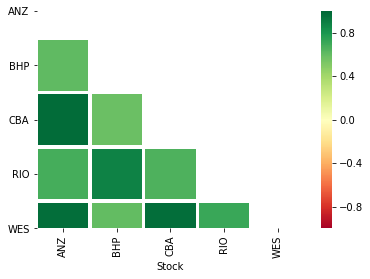

In [0]:
#take the bottom triangle since it repeats itself
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
#generate plot
sns.heatmap(corr_df, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90) 
plt.show()

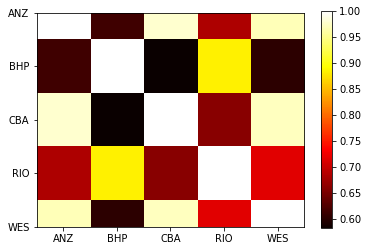

In [0]:
plt.imshow(corr_df, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_df)), corr_df.columns)
plt.yticks(range(len(corr_df)), corr_df.columns)
plt.show()

Task 2 (15 marks) 
• Calculate 5-period and 20-period moving averages for each stock. Print the last 5 values of each moving average for each stock. 
• Create a separate line plot for each stock from 2008 - 2010, with the stock’s opening price, 5-period moving average and 20-period moving average displayed using different colours.
• Record the buy and sell transactions for each stock based on the strategy above and print out the buying/selling dates/prices for the first 10 transactions of each stock. Here’s some additional information that might be helpful: 
o There are no equity constraints (i.e. the trader is able to make a trade every time the 
strategy conditions are met, regardless of how much money he has gained/lost previously and how many other stocks he is currently holding). o If a trade is open when the data for a stock ends, it should be closed (i.e. stocks sold) 
on the last day that data is available for. For example, if a trade is open for BHP on 10/08/2018 (last day of data) it should be closed at the open price on that day. o There are no transaction costs. o 1000 stocks are purchased at a time. 

In [0]:
df = pd.read_csv(r"/content/WES.csv",parse_dates=['Date'],index_col='Date')
df_1 = pd.read_csv(r"/content/RIO.csv",parse_dates=['Date'],index_col='Date')
df_2 = pd.read_csv(r"/content/ANZ.csv",parse_dates=['Date'],index_col='Date')
df_3 = pd.read_csv(r"/content/BHP.csv",parse_dates=['Date'],index_col='Date')
df_4 = pd.read_csv(r"/content/CBA.csv",parse_dates=['Date'],index_col='Date')

In [0]:
wes = df["02-01-2008":"31-12-2010"]

In [0]:
wes_5 = wes.Close.rolling(window=5).mean()
wes_20 = wes.Close.rolling(window=20).mean()

Print the last 5 values of each moving average for each stock

In [0]:
wes_5.tail(5)

Date
2010-12-23    22.18708
2010-12-24    22.30928
2010-12-29    22.38704
2010-12-30    22.42592
2010-12-31    22.40094
Name: Close, dtype: float64

In [0]:
wes_20.tail(5)

Date
2010-12-23    22.078085
2010-12-24    22.082945
2010-12-29    22.093010
2010-12-30    22.122165
2010-12-31    22.144385
Name: Close, dtype: float64

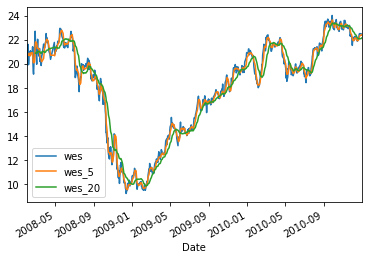

In [0]:
wes.Open.plot(label='wes')
wes_5.plot(label='wes_5')
wes_20.plot(label='wes_20')
plt.legend()

In [0]:
rio = df_1["02-01-2008":"31-12-2010"]

In [0]:
rio_5 = rio.Close.rolling(window=5).mean()
rio_20 = rio.Close.rolling(window=20).mean()

In [0]:
rio_5.tail(5)

Date
2010-12-23    56.52018
2010-12-24    56.61312
2010-12-29    56.61704
2010-12-30    56.48614
2010-12-31    56.31466
Name: Close, dtype: float64

In [0]:
rio_20.tail(5)

Date
2010-12-23    56.360490
2010-12-24    56.436410
2010-12-29    56.490075
2010-12-30    56.604285
2010-12-31    56.681845
Name: Close, dtype: float64

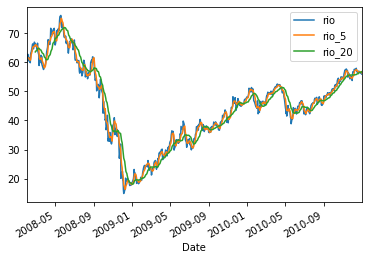

In [0]:
rio.Open.plot(label='rio')
rio_5.plot(label='rio_5')
rio_20.plot(label='rio_20')
plt.legend()

In [0]:
bhp = df_3["02-01-2008":"31-12-2010"]

In [0]:
bhp_5 = bhp.Close.rolling(window=5).mean()
bhp_20 = bhp.Close.rolling(window=20).mean()

In [0]:
bhp_5.tail(5)

Date
2010-12-23    32.38056
2010-12-24    32.52428
2010-12-29    32.61394
2010-12-30    32.67514
2010-12-31    32.59404
Name: Close, dtype: float64

In [0]:
bhp_20.tail(5)

Date
2010-12-23    31.875085
2010-12-24    31.976110
2010-12-29    32.054730
2010-12-30    32.165365
2010-12-31    32.238290
Name: Close, dtype: float64

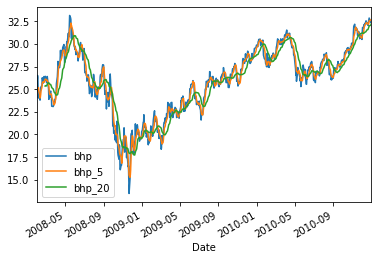

In [0]:
bhp.Open.plot(label='bhp')
bhp_5.plot(label='bhp_5')
bhp_20.plot(label='bhp_20')
plt.legend()

In [0]:
cba = df_4["02-01-2008":"31-12-2010"]

In [0]:
cba_5 = cba.Close.rolling(window=5).mean()
cba_20 = cba.Close.rolling(window=20).mean()

In [0]:
cba_5.tail(5)

Date
2010-12-23    33.47234
2010-12-24    33.52624
2010-12-29    33.59724
2010-12-30    33.63274
2010-12-31    33.61960
Name: Close, dtype: float64

In [0]:
cba_20.tail(5)

Date
2010-12-23    32.841140
2010-12-24    32.957185
2010-12-29    33.045945
2010-12-30    33.144240
2010-12-31    33.218210
Name: Close, dtype: float64

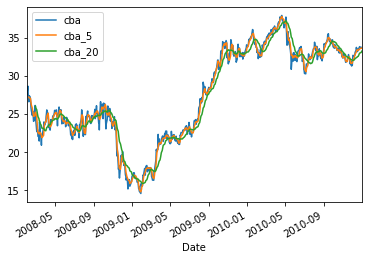

In [0]:
cba.Open.plot(label='cba')
cba_5.plot(label='cba_5')
cba_20.plot(label='cba_20')
plt.legend()

In [0]:
df_2 = pd.read_csv(r"/content/ANZ.csv",parse_dates=['Date'],index_col='Date')

In [0]:
anz = df_2["02-01-2008":"31-12-2010"]

In [0]:
anz.head()

,Open,High,Low,Close,Volume,Member
Date,,,,,,
2008-02-01,14.3835,14.7052,14.2581,14.6616,7175158,1
2008-02-04,14.8578,15.0214,14.3399,14.5580,7354632,1
2008-02-05,14.6834,14.7106,14.3726,14.3944,5004652,1
2008-02-06,14.0018,14.2090,13.7892,13.8710,6212978,1
2008-02-07,13.8437,13.9855,13.3257,13.6310,8216784,1


In [0]:
ANZ_5 = anz.Close.rolling(window=5).mean()
ANZ_20 = anz.Close.rolling(window=20).mean()

In [0]:
ANZ_5.tail(5)

Date
2010-12-23    15.27884
2010-12-24    15.29568
2010-12-29    15.35398
2010-12-30    15.35138
2010-12-31    15.31510
Name: Close, dtype: float64

In [0]:
ANZ_20.tail(5)

Date
2010-12-23    15.169665
2010-12-24    15.208535
2010-12-29    15.239310
2010-12-30    15.272350
2010-12-31    15.295025
Name: Close, dtype: float64

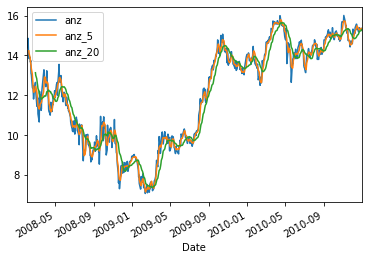

In [0]:
anz.Open.plot(label='anz')
ANZ_5.plot(label='anz_5')
ANZ_20.plot(label='anz_20')
plt.legend()

In [0]:
df.head()

,Open,High,Low,Close,Volume,Member
Date,,,,,,
2002-01-31,10.9880,11.1517,10.9880,11.1336,352225,1
2002-02-01,11.1517,11.2245,11.0786,11.0786,420276,1
2002-02-04,11.1554,11.2318,11.1190,11.1325,252276,1
2002-02-05,11.1041,11.1517,11.0790,11.0972,289673,1
2002-02-06,11.0972,11.0972,10.9407,10.9407,405261,1


In [0]:
df["5d"] = np.round(df["Close"].rolling(window = 5, center = False).mean(), 2)
df["20d"] = np.round(df["Close"].rolling(window = 20, center = False).mean(), 2)

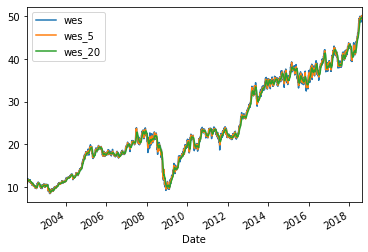

In [0]:
df.Open.plot(label='wes')
df['5d'].plot(label='wes_5')
df['20d'].plot(label='wes_20')
plt.legend()

In [0]:
df['20d-5d'] = df['20d'] - df['5d']
df.tail()

,Open,High,Low,Close,Volume,Member,5d,20d,20d-5d
Date,,,,,,,,,
2018-08-06,49.90,50.05,49.76,49.94,1154675,1,49.72,49.52,-0.20
2018-08-07,50.00,51.04,49.93,50.00,3281424,1,49.83,49.55,-0.28
2018-08-08,50.00,50.57,49.98,50.21,1987340,1,49.94,49.62,-0.32
2018-08-09,50.21,50.35,49.66,50.16,1731083,1,50.03,49.65,-0.38
2018-08-10,50.20,50.50,49.94,50.39,593825,1,50.14,49.71,-0.43


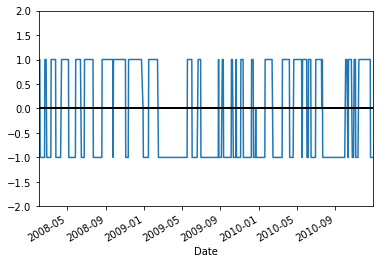

In [0]:
# np.where() is a vectorized if-else function, where a condition is checked for each component of a vector, and the first argument passed is used when the condition holds, and the other passed if it does not
df["Regime"] = np.where(df['20d-5d'] > 0, 1, 0)
# We have 1's for bullish regimes and 0's for everything else. Below I replace bearish regimes's values with -1, and to maintain the rest of the vector, the second argument is df["Regime"]
df["Regime"] = np.where(df['20d-5d'] < 0, -1, df["Regime"])
df.loc["02-01-2008":"31-12-2010","Regime"].plot(ylim = (-2,2)).axhline(y = 0, color = "black", lw = 2)


In [0]:
# To ensure that all trades close out, I temporarily change the regime of the last row to 0
regime_orig = df.loc[:, "Regime"].iloc[-1]
df.loc[:, "Regime"].iloc[-1] = 0
df["Signal"] = np.sign(df["Regime"] - df["Regime"].shift(1))
# Restore original regime data
df.loc[:, "Regime"].iloc[-1] = regime_orig
df.tail()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Open,High,Low,Close,Volume,Member,5d,20d,20d-5d,Regime,Signal
Date,,,,,,,,,,,
2018-08-06,49.90,50.05,49.76,49.94,1154675,1,49.72,49.52,-0.20,-1,0.0
2018-08-07,50.00,51.04,49.93,50.00,3281424,1,49.83,49.55,-0.28,-1,0.0
2018-08-08,50.00,50.57,49.98,50.21,1987340,1,49.94,49.62,-0.32,-1,0.0
2018-08-09,50.21,50.35,49.66,50.16,1731083,1,50.03,49.65,-0.38,-1,0.0
2018-08-10,50.20,50.50,49.94,50.39,593825,1,50.14,49.71,-0.43,-1,1.0


In [0]:
wes_signals = pd.concat([
        pd.DataFrame({"Price": df.loc[df["Signal"] == 1, "Close"],
                     "Regime": df.loc[df["Signal"] == 1, "Regime"],
                     "Signal": "Buy"}),
        pd.DataFrame({"Price": df.loc[df["Signal"] == -1, "Close"],
                     "Regime": df.loc[df["Signal"] == -1, "Regime"],
                     "Signal": "Sell"}),
    ])
wes_signals.sort_index(inplace = True)


In [0]:
wes_signals.head(10)

,Price,Regime,Signal
Date,,,
2002-02-27,11.4974,-1,Sell
2002-03-07,11.6754,1,Buy
2002-03-31,11.7306,-1,Sell
2002-04-03,11.0356,1,Buy
2002-05-07,10.8113,0,Sell
2002-05-08,10.8959,-1,Sell
2002-05-10,10.6458,1,Buy
2002-07-04,10.2965,-1,Sell
2002-07-12,9.8184,1,Buy


In [0]:
df_1["5d"] = np.round(df_1["Close"].rolling(window = 5, center = False).mean(), 2)
df_1["20d"] = np.round(df_1["Close"].rolling(window = 20, center = False).mean(), 2)

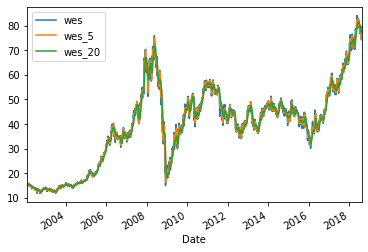

In [0]:
df_1.Open.plot(label='wes')
df_1['5d'].plot(label='wes_5')
df_1['20d'].plot(label='wes_20')
plt.legend()

In [0]:
df_1['20d-5d'] = df_1['20d'] - df_1['5d']
df_1.tail()

,Open,High,Low,Close,Volume,Member,5d,20d,20d-5d
Date,,,,,,,,,
2018-08-06,75.1465,75.2530,74.3233,74.5848,1392576,1,76.32,77.48,1.16
2018-08-07,74.2556,74.2556,73.6067,73.9844,2518736,1,75.39,77.22,1.83
2018-08-08,74.6623,74.7978,73.9941,74.7494,3126775,1,74.53,77.08,2.55
2018-08-09,75.1800,76.4700,74.9000,75.9400,2393455,1,74.68,77.01,2.33
2018-08-10,75.9000,76.0400,75.3900,75.6600,725714,1,74.98,76.92,1.94


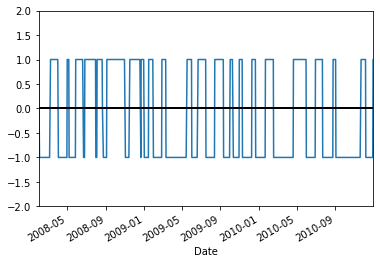

In [0]:
df_1["Regime"] = np.where(df_1['20d-5d'] > 0, 1, 0)
df_1["Regime"] = np.where(df_1['20d-5d'] < 0, -1, df_1["Regime"])
df_1.loc["02-01-2008":"31-12-2010","Regime"].plot(ylim = (-2,2)).axhline(y = 0, color = "black", lw = 2)

In [0]:
# To ensure that all trades close out, I temporarily change the regime of the last row to 0
regime_orig = df_1.loc[:, "Regime"].iloc[-1]
df_1.loc[:, "Regime"].iloc[-1] = 0
df_1["Signal"] = np.sign(df_1["Regime"] - df_1["Regime"].shift(1))
# Restore original regime data
df_1.loc[:, "Regime"].iloc[-1] = regime_orig
df_1.tail()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Open,High,Low,Close,Volume,Member,5d,20d,20d-5d,Regime,Signal
Date,,,,,,,,,,,
2018-08-06,75.1465,75.2530,74.3233,74.5848,1392576,1,76.32,77.48,1.16,1,0.0
2018-08-07,74.2556,74.2556,73.6067,73.9844,2518736,1,75.39,77.22,1.83,1,0.0
2018-08-08,74.6623,74.7978,73.9941,74.7494,3126775,1,74.53,77.08,2.55,1,0.0
2018-08-09,75.1800,76.4700,74.9000,75.9400,2393455,1,74.68,77.01,2.33,1,0.0
2018-08-10,75.9000,76.0400,75.3900,75.6600,725714,1,74.98,76.92,1.94,1,-1.0


In [0]:
rio_signals = pd.concat([
        pd.DataFrame({"Price": df_1.loc[df_1["Signal"] == 1, "Close"],
                     "Regime": df_1.loc[df_1["Signal"] == 1, "Regime"],
                     "Signal": "Buy"}),
        pd.DataFrame({"Price": df_1.loc[df_1["Signal"] == -1, "Close"],
                     "Regime": df_1.loc[df_1["Signal"] == -1, "Regime"],
                     "Signal": "Sell"}),
    ])
rio_signals.sort_index(inplace = True)

In [0]:
rio_signals.head(10)

,Price,Regime,Signal
Date,,,
2002-02-27,15.3386,1,Buy
2002-03-05,15.6457,0,Sell
2002-03-06,15.6944,-1,Sell
2002-03-18,15.1936,1,Buy
2002-05-15,14.4720,-1,Sell
2002-05-28,14.1171,1,Buy
2002-07-08,14.0895,-1,Sell
2002-07-17,12.7369,1,Buy
2002-08-15,12.9167,-1,Sell


In [0]:
df_2["5d"] = np.round(df_2["Close"].rolling(window = 5, center = False).mean(), 2)
df_2["20d"] = np.round(df_2["Close"].rolling(window = 20, center = False).mean(), 2)

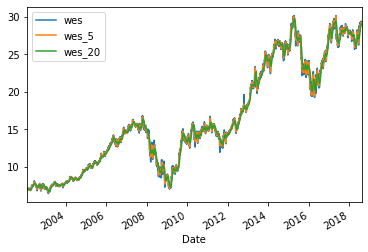

In [0]:
df_2.Open.plot(label='wes')
df_2['5d'].plot(label='wes_5')
df_2['20d'].plot(label='wes_20')
plt.legend()

In [0]:
df_2['20d-5d'] = df_2['20d'] - df_2['5d']
df_2.tail()

,Open,High,Low,Close,Volume,Member,5d,20d,20d-5d
Date,,,,,,,,,
2018-08-06,28.84,29.00,28.72,28.92,3746162,1,28.97,29.06,0.09
2018-08-07,28.99,29.09,28.94,29.09,6366645,1,28.93,29.07,0.14
2018-08-08,29.20,29.30,28.76,28.82,7054296,1,28.88,29.08,0.20
2018-08-09,28.94,29.29,28.81,29.17,5426382,1,28.93,29.08,0.15
2018-08-10,29.28,29.40,29.12,29.36,1951328,1,29.07,29.10,0.03


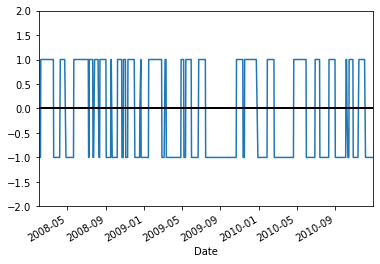

In [0]:
df_2["Regime"] = np.where(df_2['20d-5d'] > 0, 1, 0)
df_2["Regime"] = np.where(df_2['20d-5d'] < 0, -1, df_2["Regime"])
df_2.loc["02-01-2008":"31-12-2010","Regime"].plot(ylim = (-2,2)).axhline(y = 0, color = "black", lw = 2)

In [0]:
# To ensure that all trades close out, I temporarily change the regime of the last row to 0
regime_orig = df_2.loc[:, "Regime"].iloc[-1]
df_2.loc[:, "Regime"].iloc[-1] = 0
df_2["Signal"] = np.sign(df_2["Regime"] - df_2["Regime"].shift(1))
# Restore original regime data
df_2.loc[:, "Regime"].iloc[-1] = regime_orig
df_2.tail()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Open,High,Low,Close,Volume,Member,5d,20d,20d-5d,Regime,Signal
Date,,,,,,,,,,,
2018-08-06,28.84,29.00,28.72,28.92,3746162,1,28.97,29.06,0.09,1,0.0
2018-08-07,28.99,29.09,28.94,29.09,6366645,1,28.93,29.07,0.14,1,0.0
2018-08-08,29.20,29.30,28.76,28.82,7054296,1,28.88,29.08,0.20,1,0.0
2018-08-09,28.94,29.29,28.81,29.17,5426382,1,28.93,29.08,0.15,1,0.0
2018-08-10,29.28,29.40,29.12,29.36,1951328,1,29.07,29.10,0.03,1,-1.0


In [0]:
anz_signals = pd.concat([
        pd.DataFrame({"Price": df_2.loc[df_2["Signal"] == 1, "Close"],
                     "Regime": df_2.loc[df_2["Signal"] == 1, "Regime"],
                     "Signal": "Buy"}),
        pd.DataFrame({"Price": df_2.loc[df_2["Signal"] == -1, "Close"],
                     "Regime": df_2.loc[df_2["Signal"] == -1, "Regime"],
                     "Signal": "Sell"}),
    ])
anz_signals.sort_index(inplace = True)

In [0]:
anz_signals.head(10)

,Price,Regime,Signal
Date,,,
2002-02-27,7.1931,-1,Sell
2002-03-07,7.0565,1,Buy
2002-04-11,7.0096,-1,Sell
2002-06-24,7.6877,1,Buy
2002-07-15,7.6519,0,Sell
2002-07-16,7.5762,1,Buy
2002-08-12,7.3490,-1,Sell
2002-09-24,7.5044,1,Buy
2002-10-21,7.1139,-1,Sell


In [0]:
df_3["5d"] = np.round(df_3["Close"].rolling(window = 5, center = False).mean(), 2)
df_3["20d"] = np.round(df_3["Close"].rolling(window = 20, center = False).mean(), 2)

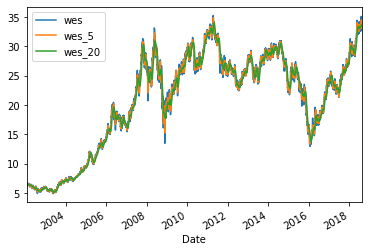

In [0]:
df_3.Open.plot(label='wes')
df_3['5d'].plot(label='wes_5')
df_3['20d'].plot(label='wes_20')
plt.legend()

In [0]:
df_3['20d-5d'] = df_3['20d'] - df_3['5d']
df_3.tail()

,Open,High,Low,Close,Volume,Member,5d,20d,20d-5d
Date,,,,,,,,,
2018-08-06,34.06,34.17,33.975,34.10,4349136,1,34.27,33.67,-0.60
2018-08-07,33.67,33.79,33.530,33.62,6650053,1,34.02,33.64,-0.38
2018-08-08,34.25,34.30,33.820,33.94,6257443,1,33.79,33.65,-0.14
2018-08-09,33.99,34.24,33.680,33.96,6221368,1,33.80,33.66,-0.14
2018-08-10,33.99,34.05,33.810,33.99,1419106,1,33.92,33.70,-0.22


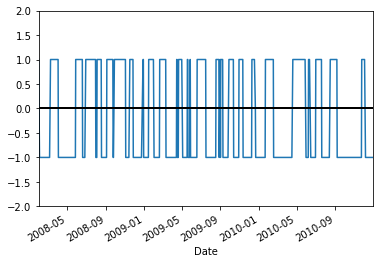

In [0]:
df_3["Regime"] = np.where(df_3['20d-5d'] > 0, 1, 0)
df_3["Regime"] = np.where(df_3['20d-5d'] < 0, -1, df_3["Regime"])
df_3.loc["02-01-2008":"31-12-2010","Regime"].plot(ylim = (-2,2)).axhline(y = 0, color = "black", lw = 2)

In [0]:
# To ensure that all trades close out, I temporarily change the regime of the last row to 0
regime_orig = df_3.loc[:, "Regime"].iloc[-1]
df_3.loc[:, "Regime"].iloc[-1] = 0
df_3["Signal"] = np.sign(df_3["Regime"] - df_3["Regime"].shift(1))
# Restore original regime data
df_3.loc[:, "Regime"].iloc[-1] = regime_orig
df_3.tail()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Open,High,Low,Close,Volume,Member,5d,20d,20d-5d,Regime,Signal
Date,,,,,,,,,,,
2018-08-06,34.06,34.17,33.975,34.10,4349136,1,34.27,33.67,-0.60,-1,0.0
2018-08-07,33.67,33.79,33.530,33.62,6650053,1,34.02,33.64,-0.38,-1,0.0
2018-08-08,34.25,34.30,33.820,33.94,6257443,1,33.79,33.65,-0.14,-1,0.0
2018-08-09,33.99,34.24,33.680,33.96,6221368,1,33.80,33.66,-0.14,-1,0.0
2018-08-10,33.99,34.05,33.810,33.99,1419106,1,33.92,33.70,-0.22,-1,1.0


In [0]:
bhp_signals = pd.concat([
        pd.DataFrame({"Price": df_3.loc[df_3["Signal"] == 1, "Close"],
                     "Regime": df_3.loc[df_3["Signal"] == 1, "Regime"],
                     "Signal": "Buy"}),
        pd.DataFrame({"Price": df_3.loc[df_3["Signal"] == -1, "Close"],
                     "Regime": df_3.loc[df_3["Signal"] == -1, "Regime"],
                     "Signal": "Sell"}),
    ])
bhp_signals.sort_index(inplace = True)

In [0]:
bhp_signals.head(10)

,Price,Regime,Signal
Date,,,
2002-02-27,6.3992,1,Buy
2002-03-06,6.4975,-1,Sell
2002-03-15,6.1617,1,Buy
2002-04-05,6.3773,-1,Sell
2002-04-23,6.2135,1,Buy
2002-05-14,6.1043,-1,Sell
2002-05-27,6.0443,1,Buy
2002-07-02,5.9805,-1,Sell
2002-07-17,5.4905,1,Buy


In [0]:
df_4["5d"] = np.round(df_4["Close"].rolling(window = 5, center = False).mean(), 2)
df_4["20d"] = np.round(df_4["Close"].rolling(window = 20, center = False).mean(), 2)

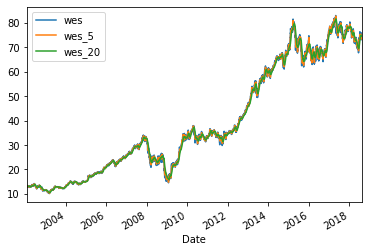

In [0]:
df_4.Open.plot(label='wes')
df_4['5d'].plot(label='wes_5')
df_4['20d'].plot(label='wes_20')
plt.legend()

In [0]:
df_4['20d-5d'] = df_4['20d'] - df_4['5d']
df_4.tail()

,Open,High,Low,Close,Volume,Member,5d,20d,20d-5d
Date,,,,,,,,,
2018-08-06,73.04,73.860,73.00,73.56,2333301,1,73.71,74.62,0.91
2018-08-07,73.60,73.790,72.65,72.89,4468425,1,73.33,74.54,1.21
2018-08-08,74.18,74.925,73.21,74.81,5778347,1,73.55,74.58,1.03
2018-08-09,75.18,75.690,74.63,75.37,4028257,1,73.89,74.59,0.70
2018-08-10,75.71,76.000,75.53,75.54,2671166,1,74.43,74.62,0.19


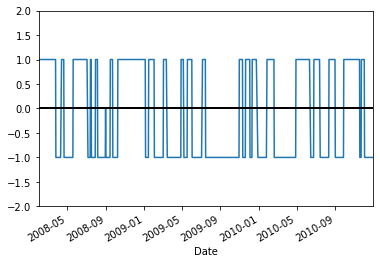

In [0]:
df_4["Regime"] = np.where(df_4['20d-5d'] > 0, 1, 0)
df_4["Regime"] = np.where(df_4['20d-5d'] < 0, -1, df_4["Regime"])
df_4.loc["02-01-2008":"31-12-2010","Regime"].plot(ylim = (-2,2)).axhline(y = 0, color = "black", lw = 2)

In [0]:
# To ensure that all trades close out, I temporarily change the regime of the last row to 0
regime_orig = df_4.loc[:, "Regime"].iloc[-1]
df_4.loc[:, "Regime"].iloc[-1] = 0
df_4["Signal"] = np.sign(df_4["Regime"] - df_4["Regime"].shift(1))
# Restore original regime data
df_4.loc[:, "Regime"].iloc[-1] = regime_orig
df_4.tail()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Open,High,Low,Close,Volume,Member,5d,20d,20d-5d,Regime,Signal
Date,,,,,,,,,,,
2018-08-06,73.04,73.860,73.00,73.56,2333301,1,73.71,74.62,0.91,1,0.0
2018-08-07,73.60,73.790,72.65,72.89,4468425,1,73.33,74.54,1.21,1,0.0
2018-08-08,74.18,74.925,73.21,74.81,5778347,1,73.55,74.58,1.03,1,0.0
2018-08-09,75.18,75.690,74.63,75.37,4028257,1,73.89,74.59,0.70,1,0.0
2018-08-10,75.71,76.000,75.53,75.54,2671166,1,74.43,74.62,0.19,1,-1.0


In [0]:
cba_signals = pd.concat([
        pd.DataFrame({"Price": df_4.loc[df_4["Signal"] == 1, "Close"],
                     "Regime": df_4.loc[df_4["Signal"] == 1, "Regime"],
                     "Signal": "Buy"}),
        pd.DataFrame({"Price": df_4.loc[df_4["Signal"] == -1, "Close"],
                     "Regime": df_4.loc[df_4["Signal"] == -1, "Regime"],
                     "Signal": "Sell"}),
    ])
cba_signals.sort_index(inplace = True)

In [0]:
cba_signals.head(10)

,Price,Regime,Signal
Date,,,
2002-02-27,13.0539,-1,Sell
2002-03-06,12.7711,1,Buy
2002-03-21,12.9921,-1,Sell
2002-04-05,12.9717,0,Buy
2002-04-08,12.9348,1,Buy
2002-04-18,13.1477,-1,Sell
2002-05-15,13.3073,1,Buy
2002-05-30,13.7535,-1,Sell
2002-06-24,13.8108,0,Buy


Task 3 (10 marks) 
• Create a data frame containing information about all of the trades the strategy made (i.e. trades for every stock should be in the one data frame). Print the first 10 rows and last 10 rows of the data frame. The data frame should have the following columns: 
o Stock – name of the stock o Open_Date – starting date of the trade o Close_Date – closing data of the trade 
o Open_Price – buying price of the trade o Close_Price – selling price of the trade o Quantity – trade quantity (hint – this should always be 1000 – see Task 2) o Profit – profit of the trade 
• Calculate descriptive statistics (sum/total, number of trades, mean, median, standard deviation, maximum and minimum) of the trading profits for each stock, as well as the total trading profits. 
• Comment on the performance of the strategy, including which stock performed the best and whether you would recommend this strategy to the trader. 

In [0]:
df['Stock'] = 'WES'
df_1['Stock'] = 'RIO'
df_2['Stock'] = 'ANZ'
df_3['Stock'] = 'BHP'
df_4['Stock'] = 'CBA'
data = pd.concat([df,df_1,df_2,df_3,df_4], ignore_index=True)
data.drop('Member',axis=1,inplace=True)


In [0]:
data.head(10)

,Open,High,Low,Close,Volume,Stock,profit
0,10.9880,11.1517,10.9880,11.1336,352225,WES,51283.9600
1,11.1517,11.2245,11.0786,11.0786,420276,WES,-30722.1756
2,11.1554,11.2318,11.1190,11.1325,252276,WES,-5777.1204
3,11.1041,11.1517,11.0790,11.0972,289673,WES,-1998.7437
4,11.0972,11.0972,10.9407,10.9407,405261,WES,-63423.3465
5,10.9254,10.9880,10.8752,10.9153,606487,WES,-6125.5187
6,10.9174,11.1336,10.9174,11.1212,333327,WES,67932.0426
7,11.1190,11.1990,10.9880,11.1394,351876,WES,7178.2704
8,11.2038,11.8103,11.1517,11.8103,1437569,WES,871885.5985
9,11.9518,12.0068,11.6793,11.8067,805823,WES,-116924.9173


In [0]:
data.tail(10)

,Open,High,Low,Close,Volume,Stock,profit
21168,75.05,75.090,74.74,74.90,2106110,CBA,-315916.50
21169,75.20,75.430,74.79,74.79,2767166,CBA,-1134538.06
21170,74.38,74.610,73.66,73.71,3680163,CBA,-2465709.21
21171,74.00,74.240,73.43,73.68,2716773,CBA,-869367.36
21172,73.99,74.100,72.75,72.83,4192490,CBA,-4863288.40
21173,73.04,73.860,73.00,73.56,2333301,CBA,1213316.52
21174,73.60,73.790,72.65,72.89,4468425,CBA,-3172581.75
21175,74.18,74.925,73.21,74.81,5778347,CBA,3640358.61
21176,75.18,75.690,74.63,75.37,4028257,CBA,765368.83
21177,75.71,76.000,75.53,75.54,2671166,CBA,-454098.22


In [0]:
data['profit'] = (data['Close'] - data['Open'])*data['Volume']

In [0]:
data.head(10)

,Open,High,Low,Close,Volume,Stock,profit
0,10.9880,11.1517,10.9880,11.1336,352225,WES,51283.9600
1,11.1517,11.2245,11.0786,11.0786,420276,WES,-30722.1756
2,11.1554,11.2318,11.1190,11.1325,252276,WES,-5777.1204
3,11.1041,11.1517,11.0790,11.0972,289673,WES,-1998.7437
4,11.0972,11.0972,10.9407,10.9407,405261,WES,-63423.3465
5,10.9254,10.9880,10.8752,10.9153,606487,WES,-6125.5187
6,10.9174,11.1336,10.9174,11.1212,333327,WES,67932.0426
7,11.1190,11.1990,10.9880,11.1394,351876,WES,7178.2704
8,11.2038,11.8103,11.1517,11.8103,1437569,WES,871885.5985
9,11.9518,12.0068,11.6793,11.8067,805823,WES,-116924.9173


In [0]:
data.tail(10)

,Open,High,Low,Close,Volume,Stock,profit
21168,75.05,75.090,74.74,74.90,2106110,CBA,-315916.50
21169,75.20,75.430,74.79,74.79,2767166,CBA,-1134538.06
21170,74.38,74.610,73.66,73.71,3680163,CBA,-2465709.21
21171,74.00,74.240,73.43,73.68,2716773,CBA,-869367.36
21172,73.99,74.100,72.75,72.83,4192490,CBA,-4863288.40
21173,73.04,73.860,73.00,73.56,2333301,CBA,1213316.52
21174,73.60,73.790,72.65,72.89,4468425,CBA,-3172581.75
21175,74.18,74.925,73.21,74.81,5778347,CBA,3640358.61
21176,75.18,75.690,74.63,75.37,4028257,CBA,765368.83
21177,75.71,76.000,75.53,75.54,2671166,CBA,-454098.22


In [0]:
data.describe()

,Open,High,Low,Close,Volume,profit
count,21178.000000,21178.000000,21178.000000,21178.000000,2.117800e+04,2.117800e+04
mean,28.017879,28.228874,27.791761,28.009648,6.098525e+06,-4.154602e+04
std,17.084839,17.198255,16.966717,17.082790,5.900750e+06,2.708560e+06
min,4.922500,4.976300,4.882400,4.900100,4.696500e+04,-6.175140e+07
25%,14.958825,15.065050,14.849900,14.965600,2.380961e+06,-6.173013e+05
50%,23.930700,24.152350,23.711750,23.932250,4.016532e+06,-7.178737e+03
75%,35.872250,36.092100,35.550050,35.809725,7.978558e+06,5.453086e+05
max,84.152400,84.336400,83.280900,84.007200,9.655790e+07,5.879643e+07


In [0]:
pd.Series.groupby(data.profit,by=data.Stock).mean()

Stock
ANZ    -36117.354821
BHP   -107614.366495
CBA    -31856.700308
RIO     -7591.955252
WES    -24478.594936
Name: profit, dtype: float64

so overall RIO stocks performed well when compared with the other stocks 
BHP performed worst among all other stocks.

In [0]:
data['profit1'] = (data['Close'] - data['Open'])*1000


In [0]:
pd.Series.groupby(data.profit1,by=data.Stock).mean()

Stock
ANZ    -6.694193
BHP    -6.457193
CBA    -7.972721
RIO    -7.409649
WES   -12.631166
Name: profit1, dtype: float64

so overall BHP stocks performed well when compared with the other stocks 
WES performed worst among all other stocks.